## Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.
## Answer 

In [1]:
import pandas as pd

C:\Users\theha\AppData\Local\Temp\ipykernel_24696\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop("target", axis=1)

In [7]:
y = df[["target"]]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [11]:
clf.fit(X_train, y_train)

C:\Users\theha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy = accuracy_score(y_test, y_pred)

In [15]:
accuracy

0.8241758241758241

## 

##  Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.
## Answer 

In [16]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## NO MISSING VALUES

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## NO CATEGORICAL VALUES

## NO NEED TO STANDARD SCALE THE DATASET
#### As we are using random forest, it works on many decision trees which is not so sensitive for standard scaling. if we would use the ML Algorithms like KNN, SVM & Algorithms based on gradient descents(linear regression, Logistic regressions & Neural Networks)... then there Standard Scaling could do some better.

## 

## Q2. Split the dataset into a training set (70%) and a test set (30%).
## Answer 

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
X = df.drop("target", axis=1)

In [20]:
y = df["target"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

## 

## Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.
## Answer 

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10)

In [24]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

##  Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.
## Answer 

In [25]:
y_pred = clf.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
x = [accuracy_score, precision_score, recall_score, f1_score]

In [27]:
def performance(x,y_test, y_pred):
    results = {}
    for metric in x:
        results[metric] = metric(y_test, y_pred)
    return results 

In [28]:
performance(x, y_test, y_pred)

{<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>: 0.8461538461538461,
 <function sklearn.metrics._classification.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>: 0.851063829787234,
 <function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>: 0.851063829787234,
 <function sklearn.metrics._classification.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>: 0.851063829787234}

## 

## Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.
## Answer 

In [29]:
important_features = clf.feature_importances_

In [30]:
important_features

array([0.08899451, 0.03751884, 0.10002196, 0.08446485, 0.07577182,
       0.0136815 , 0.02542336, 0.1320214 , 0.05520992, 0.11466952,
       0.05334055, 0.11737638, 0.1015054 ])

In [31]:
imp_features = pd.DataFrame({"Features": X.columns, "Feature_Importance":important_features})

In [32]:
imp_features

,Features,Feature_Importance
0,age,0.088995
1,sex,0.037519
2,cp,0.100022
3,trestbps,0.084465
4,chol,0.075772
5,fbs,0.013681
6,restecg,0.025423
7,thalach,0.132021
8,exang,0.055210
9,oldpeak,0.114670


## sorting the data

In [33]:
imp_features = imp_features.sort_values(by="Feature_Importance", ascending=False)

In [34]:
imp_features.head()

,Features,Feature_Importance
7,thalach,0.132021
11,ca,0.117376
9,oldpeak,0.114670
12,thal,0.101505
2,cp,0.100022


In [35]:
import matplotlib.pyplot as plt

<BarContainer object of 13 artists>

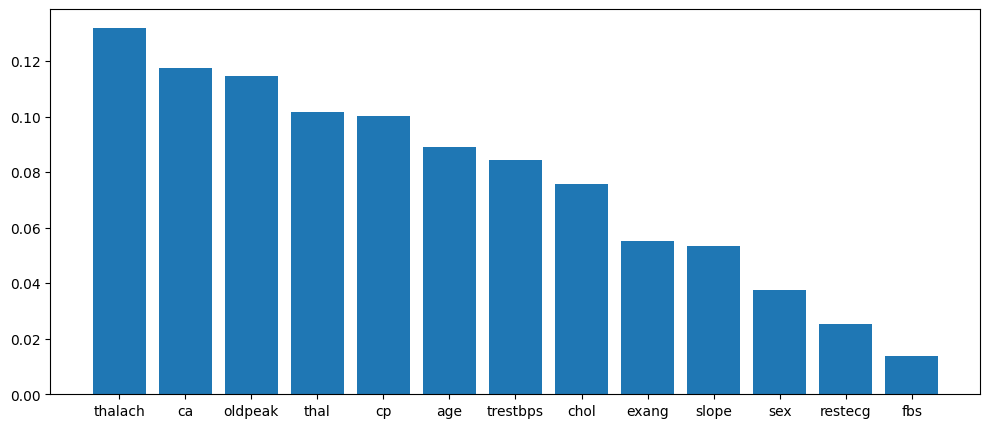

In [36]:
plt.figure(figsize=(12,5))
plt.bar(x=imp_features["Features"] , height=imp_features["Feature_Importance"])

## 

## Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.
## Answer 

In [37]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [38]:
param = {
    "n_estimators" : [10, 100, 1000],
    "max_depth" : [5,10,15,],
    "min_samples_split" : [2,4,6],
    "min_samples_leaf" : [1,2,3],
}

In [39]:
clf = RandomForestClassifier()

In [40]:
cv = RandomizedSearchCV(clf, param, scoring="accuracy", cv=5, verbose = 3)

In [41]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10;, score=0.857 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10;, score=0.786 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10;, score=0.810 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.814 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.810 total time=   0.0s
[CV

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 1000]},
                   scoring='accuracy', verbose=3)

In [42]:
cv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [43]:
cv.predict(X_test)

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1], dtype=int64)

In [44]:
accuracy_score(y_test, cv.predict(X_test))

0.8461538461538461

In [45]:
cv2 = GridSearchCV(clf, param, scoring="accuracy", cv = 5, verbose = 3)
cv2.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.907 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.810 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.738 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.810 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.907 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.814 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.810 total time=   0.0s
[CV 4/5

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 100, 1000]},
             scoring='accuracy', verbose=3)

In [46]:
cv2.best_params_

{'max_depth': 15,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 1000}

## 

## Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.
## Answer 

In [64]:
RS_CV = {'n_estimators': 10,'min_samples_split': 6,'min_samples_leaf': 2,'max_depth': 15}
GS_CV ={'max_depth': 15,'min_samples_leaf': 3,'min_samples_split': 6,'n_estimators': 1000}
print(RS_CV)
print(GS_CV)

{'n_estimators': 10, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_depth': 15}
{'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 1000}


In [68]:
RS_performance = accuracy_score(y_test,cv.predict(X_test))
GS_performance = accuracy_score(y_test, cv2.predict(X_test))

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- age
- ca
- chol
- exang
- fbs
- ...


In [66]:
RS_performance

0.8461538461538461

In [67]:
GS_performance

0.8461538461538461

## 

## Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.
## Answer 

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [52]:
df = df[["thalach", "cp", "target"]]

In [53]:
df

,thalach,cp,target
0,150,3,1
1,187,2,1
2,172,1,1
3,178,1,1
4,163,0,1
...,...,...,...
298,123,0,0
299,132,3,0
300,141,0,0
301,115,0,0


In [54]:
X = df.iloc[:, :-1]
y = df["target"]

In [55]:
X

,thalach,cp
0,150,3
1,187,2
2,172,1
3,178,1
4,163,0
...,...,...
298,123,0
299,132,3
300,141,0
301,115,0


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
clf = RandomForestClassifier(n_estimators=10, min_samples_split= 6, min_samples_leaf= 2, max_depth= 15)

In [58]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=6,
                       n_estimators=10)

In [59]:
xmin, xmax = X_train.iloc[:, 0].min() - 1 , X_train.iloc[:, 0].max() + 1
ymin, ymax = X_train.iloc[:, 1].min() - 1 , X_train.iloc[:, 1].max() + 1

In [60]:
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.01),
                     np.arange(ymin, ymax, 0.01))

In [61]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

C:\Users\theha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [62]:
Z = Z.reshape(xx.shape)

Text(0.5, 1.0, 'Decision Boundary of 2 most imp features')

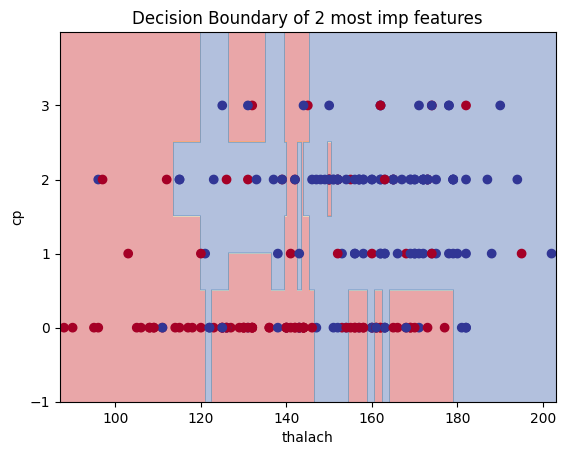

In [70]:
plt.contourf(xx,yy,Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.xlabel("thalach")
plt.ylabel("cp")
plt.title("Decision Boundary of 2 most imp features")